In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as s mf

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
df = pd.read_csv('Default.csv')

In [3]:
df.default.factorize()

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Index(['No', 'Yes'], dtype='object'))

In [4]:
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


In [5]:
df["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [6]:
df["default"].value_counts()/len(df["default"])

No     0.9667
Yes    0.0333
Name: default, dtype: float64

In [7]:
df[df.default2 == 0].sample(frac = 0.15)

,default,student,balance,income,default2,student2
7566,No,No,922.124107,48137.371673,0,0
321,No,Yes,1200.847390,19849.831413,0,1
6894,No,Yes,369.679932,24834.417581,0,1
7442,No,No,618.127038,29836.285655,0,0
6879,No,No,1970.859761,37905.252633,0,0
...,...,...,...,...,...,...
6544,No,No,0.000000,42879.396938,0,0
1918,No,No,412.902061,49060.923739,0,0
6592,No,No,49.682397,47026.038545,0,0
5434,No,Yes,1277.894900,20649.929987,0,1


In [8]:
# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]
df_ = df_no.append(df_yes)

In [9]:
df_["default"].value_counts()

No     1450
Yes     333
Name: default, dtype: int64

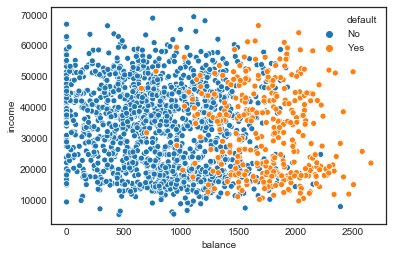

In [10]:
sns.scatterplot(x = 'balance', y = 'income', hue = 'default', data = df_);

In [15]:
X = df[['balance', 'income', 'student2']].values
y = df.default2.values

In [18]:
lda = LinearDiscriminantAnalysis(solver='svd')
lda_model = lda.fit(X, y)

In [19]:
y_pred = lda_model.predict(X)

In [23]:
result_df = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})

In [24]:
result_df.head()

,True default status,Predicted default status
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [25]:
result_df.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

In [26]:
result_df.head()

,True default status,Predicted default status
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No


In [27]:
df_.groupby(['Predicted default status','True default status']).size()

Predicted default status  True default status
0                         0                      9645
                          1                       254
1                         0                        22
                          1                        79
dtype: int64

In [28]:
df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,0,1
Predicted default status,,
0,9645,254
1,22,79


In [29]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



In [30]:
decision_prob = 0.2
y_prob = lda_model.predict_proba(X)

In [31]:
y_prob

array([[9.96776483e-01, 3.22351679e-03],
       [9.97310469e-01, 2.68953132e-03],
       [9.85291400e-01, 1.47085998e-02],
       ...,
       [9.93867912e-01, 6.13208754e-03],
       [8.62826402e-01, 1.37173598e-01],
       [9.99846451e-01, 1.53549027e-04]])

In [33]:
result_df2 = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_prob[:,1] > decision_prob})

In [34]:
result_df2.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)
result_df2.head()

,True default status,Predicted default status
0,No,False
1,No,False
2,No,False
3,No,False
4,No,False


In [35]:
result_df2.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
False,9435,140
True,232,193


In [44]:
df = pd.read_csv('Smarket.csv', index_col=0, parse_dates=True)

In [45]:
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [46]:
X_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

X_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

In [47]:
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train, y_train)

In [48]:
y_pred = lda_model.predict(X_test)

In [49]:
y_pred

array(['Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 

In [50]:
lda.priors_

array([0.49198397, 0.50801603])

In [51]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [52]:
lda.coef_

array([[-0.05544078, -0.0443452 ]])

In [54]:
confusion_matrix(y_test, y_pred)

array([[ 35,  76],
       [ 35, 106]], dtype=int64)

In [57]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

    accuracy                          0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



In [58]:
pred_p = lda.predict_proba(X_test)

In [59]:
np.unique(pred_p[:,1]>0.5, return_counts=True)

(array([False,  True]), array([ 70, 182], dtype=int64))

In [60]:
np.unique(pred_p[:,1]>0.9, return_counts=True)

(array([False]), array([252], dtype=int64))

In [61]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

In [62]:
qda.priors_


array([0.49198397, 0.50801603])

In [63]:
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [64]:
confusion_matrix(y_test, pred)

array([[ 30,  81],
       [ 20, 121]], dtype=int64)

In [65]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.600     0.270     0.373       111
          Up      0.599     0.858     0.706       141

    accuracy                          0.599       252
   macro avg      0.600     0.564     0.539       252
weighted avg      0.599     0.599     0.559       252

